Distance of clusters (ATAC seq dynamics during reprogramming) to biallelically accessible regions at day 0.


Check if you have the packages installed:

In [1]:
library(ggplot2)
library(dplyr)
library(readr)
library(tidyr)
library(repr)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



# __<font color=purple>1. Import/Prepare data</font>__

In [5]:
#go to new directory
setwd('/ddn1/vol1/staging/leuven/stg_00041/Irene/Figure_2/')

In [6]:
#check:
getwd()

[1] "/ddn1/vol1/staging/leuven/stg_00041/Irene/Figure_2"

In [7]:
#read data:
Peak_centre_BIALLELICday0<-read_delim('PeakCentre_Day0.csv',delim=';')
Peak_centre_allclusters<-read_delim('PeakCentre_allclustersNEW.csv',delim=';')

Parsed with column specification:
cols(
  cluster = col_character(),
  Peak_centre = col_double()
)
Parsed with column specification:
cols(
  cluster = col_character(),
  Peak_centre = col_double()
)


In [8]:
(Peak_centre_allclusters)
(Peak_centre_BIALLELICday0)

cluster,Peak_centre
C6,11634021
C6,13206734
C6,13280726
C6,13281186
C6,13281778
C6,13294817
C6,18162018
C6,18163936
C6,18164422
C6,18187174


cluster,Peak_centre
Day0_opened,7473814
Day0_opened,7568022
Day0_opened,73312628
Day0_opened,73792118
Day0_opened,84454616
Day0_opened,167210476
Day0_opened,136976669
Day0_opened,23296828
Day0_opened,99130393
Day0_opened,162950071


In [9]:
nrow(Peak_centre_allclusters)
nrow(Peak_centre_BIALLELICday0)

[1] 750

[1] 109

# __<font color=purple>2. Closer distance from Peak Centre to ATAC escapee regions</font>__

In [10]:
# Create a function: create range of numbers with ATAC escapee regions, store these numbers in i and take the each i and substract from all the peak centres.


distances_function<-function(Peak_centre,centers){
    distances<-list()
    for (i in 1:length(centers)){
        distances[[i]]<-abs(Peak_centre-centers[i])
        
    }
    return(distances)
}

In [11]:
distances_function(1,Peak_centre_BIALLELICday0$Peak_centre)

[[1]]
[1] 7473814

[[2]]
[1] 7568021

[[3]]
[1] 73312626

[[4]]
[1] 73792116

[[5]]
[1] 84454616

[[6]]
[1] 167210475

[[7]]
[1] 136976668

[[8]]
[1] 23296827

[[9]]
[1] 99130392

[[10]]
[1] 162950070

[[11]]
[1] 93286542

[[12]]
[1] 100597714

[[13]]
[1] 103719777

[[14]]
[1] 140278252

[[15]]
[1] 99567797

[[16]]
[1] 162915955

[[17]]
[1] 20873809

[[18]]
[1] 52934768

[[19]]
[1] 77518733

[[20]]
[1] 135753122

[[21]]
[1] 144645701

[[22]]
[1] 159841987

[[23]]
[1] 164232940

[[24]]
[1] 152308136

[[25]]
[1] 48256758

[[26]]
[1] 12088644

[[27]]
[1] 159988368

[[28]]
[1] 136868442

[[29]]
[1] 143394270

[[30]]
[1] 56531572

[[31]]
[1] 7435705

[[32]]
[1] 13206733

[[33]]
[1] 101942250

[[34]]
[1] 142551436

[[35]]
[1] 155318306

[[36]]
[1] 158925154

[[37]]
[1] 159287081

[[38]]
[1] 48256276

[[39]]
[1] 136171280

[[40]]
[1] 12157589

[[41]]
[1] 20761312

[[42]]
[1] 166661416

[[43]]
[1] 94197983

[[44]]
[1] 152781738

[[45]]
[1] 157644676

[[46]]
[1] 13294816

[[47]]
[1] 71131716

[[48]]
[1] 136197156

[[49]]
[1] 103911256

[[50]]
[1] 105104301

[[51]]
[1] 157487217

[[52]]
[1] 143444696

[[53]]
[1] 6261730

[[54]]
[1] 7910644

[[55]]
[1] 12558030

[[56]]
[1] 140183236

[[57]]
[1] 169307612

[[58]]
[1] 150459242

[[59]]
[1] 169884130

[[60]]
[1] 47993074

[[61]]
[1] 73798005

[[62]]
[1] 13710375

[[63]]
[1] 102003770

[[64]]
[1] 134925256

[[65]]
[1] 152835251

[[66]]
[1] 139832814

[[67]]
[1] 159510505

[[68]]
[1] 94185620

[[69]]
[1] 13225038

[[70]]
[1] 95018254

[[71]]
[1] 157454466

[[72]]
[1] 135035844

[[73]]
[1] 74452934

[[74]]
[1] 105080179

[[75]]
[1] 140505972

[[76]]
[1] 164004908

[[77]]
[1] 50657832

[[78]]
[1] 94177928

[[79]]
[1] 103493755

[[80]]
[1] 94193992

[[81]]
[1] 86193355

[[82]]
[1] 106013471

[[83]]
[1] 8733186

[[84]]
[1] 94675046

[[85]]
[1] 103529384

[[86]]
[1] 103515382

[[87]]
[1] 105070246

[[88]]
[1] 103622203

[[89]]
[1] 52776228

[[90]]
[1] 103321467

[[91]]
[1] 18162016

[[92]]
[1] 94213352

[[93]]
[1] 103624662

[[94]]
[1] 94212995

[[95]]
[1] 150478279

[[96]]
[1] 103374422

[[97]]
[1] 11634020

[[98]]
[1] 13281185

[[99]]
[1] 13280724

[[100]]
[1] 103617004

[[101]]
[1] 13281777

[[102]]
[1] 103509642

[[103]]
[1] 18164421

[[104]]
[1] 164106230

[[105]]
[1] 152233500

[[106]]
[1] 8162186

[[107]]
[1] 18163935

[[108]]
[1] 105079350

[[109]]
[1] 103477656

In [12]:
# escapees from ATAC:
Distance_to_BIALLELICday0<-list()
    for (j in 1:length(Peak_centre_allclusters$Peak_centre)){
        Distance_to_BIALLELICday0[[j]]<-distances_function(Peak_centre_allclusters$Peak_centre[j],Peak_centre_BIALLELICday0$Peak_centre)
    }


In [13]:
head(Distance_to_BIALLELICday0,n=1)

[[1]]
[[1]][[1]]
[1] 4160206

[[1]][[2]]
[1] 4065999

[[1]][[3]]
[1] 61678606

[[1]][[4]]
[1] 62158096

[[1]][[5]]
[1] 72820596

[[1]][[6]]
[1] 155576455

[[1]][[7]]
[1] 125342648

[[1]][[8]]
[1] 11662807

[[1]][[9]]
[1] 87496372

[[1]][[10]]
[1] 151316050

[[1]][[11]]
[1] 81652522

[[1]][[12]]
[1] 88963694

[[1]][[13]]
[1] 92085757

[[1]][[14]]
[1] 128644232

[[1]][[15]]
[1] 87933777

[[1]][[16]]
[1] 151281935

[[1]][[17]]
[1] 9239789

[[1]][[18]]
[1] 41300748

[[1]][[19]]
[1] 65884713

[[1]][[20]]
[1] 124119102

[[1]][[21]]
[1] 133011681

[[1]][[22]]
[1] 148207967

[[1]][[23]]
[1] 152598920

[[1]][[24]]
[1] 140674116

[[1]][[25]]
[1] 36622738

[[1]][[26]]
[1] 454623.5

[[1]][[27]]
[1] 148354348

[[1]][[28]]
[1] 125234422

[[1]][[29]]
[1] 131760250

[[1]][[30]]
[1] 44897552

[[1]][[31]]
[1] 4198315

[[1]][[32]]
[1] 1572713

[[1]][[33]]
[1] 90308230

[[1]][[34]]
[1] 130917416

[[1]][[35]]
[1] 143684286

[[1]][[36]]
[1] 147291134

[[1]][[37]]
[1] 147653061

[[1]][[38]]
[1] 36622256

[[1]][[39]]
[1] 124537260

[[1]][[40]]
[1] 523569

[[1]][[41]]
[1] 9127292

[[1]][[42]]
[1] 155027396

[[1]][[43]]
[1] 82563963

[[1]][[44]]
[1] 141147718

[[1]][[45]]
[1] 146010656

[[1]][[46]]
[1] 1660796

[[1]][[47]]
[1] 59497696

[[1]][[48]]
[1] 124563136

[[1]][[49]]
[1] 92277236

[[1]][[50]]
[1] 93470281

[[1]][[51]]
[1] 145853197

[[1]][[52]]
[1] 131810676

[[1]][[53]]
[1] 5372290

[[1]][[54]]
[1] 3723376

[[1]][[55]]
[1] 924009.5

[[1]][[56]]
[1] 128549216

[[1]][[57]]
[1] 157673592

[[1]][[58]]
[1] 138825222

[[1]][[59]]
[1] 158250110

[[1]][[60]]
[1] 36359054

[[1]][[61]]
[1] 62163985

[[1]][[62]]
[1] 2076355

[[1]][[63]]
[1] 90369750

[[1]][[64]]
[1] 123291236

[[1]][[65]]
[1] 141201231

[[1]][[66]]
[1] 128198794

[[1]][[67]]
[1] 147876485

[[1]][[68]]
[1] 82551600

[[1]][[69]]
[1] 1591018

[[1]][[70]]
[1] 83384234

[[1]][[71]]
[1] 145820446

[[1]][[72]]
[1] 123401824

[[1]][[73]]
[1] 62818914

[[1]][[74]]
[1] 93446159

[[1]][[75]]
[1] 128871952

[[1]][[76]]
[1] 152370888

[[1]][[77]]
[1] 39023812

[[1]][[78]]
[1] 82543908

[[1]][[79]]
[1] 91859735

[[1]][[80]]
[1] 82559972

[[1]][[81]]
[1] 74559335

[[1]][[82]]
[1] 94379451

[[1]][[83]]
[1] 2900834

[[1]][[84]]
[1] 83041026

[[1]][[85]]
[1] 91895364

[[1]][[86]]
[1] 91881362

[[1]][[87]]
[1] 93436226

[[1]][[88]]
[1] 91988183

[[1]][[89]]
[1] 41142208

[[1]][[90]]
[1] 91687447

[[1]][[91]]
[1] 6527996

[[1]][[92]]
[1] 82579332

[[1]][[93]]
[1] 91990642

[[1]][[94]]
[1] 82578975

[[1]][[95]]
[1] 138844259

[[1]][[96]]
[1] 91740402

[[1]][[97]]
[1] 0.5

[[1]][[98]]
[1] 1647165

[[1]][[99]]
[1] 1646704

[[1]][[100]]
[1] 91982984

[[1]][[101]]
[1] 1647757

[[1]][[102]]
[1] 91875622

[[1]][[103]]
[1] 6530401

[[1]][[104]]
[1] 152472210

[[1]][[105]]
[1] 140599480

[[1]][[106]]
[1] 3471834

[[1]][[107]]
[1] 6529915

[[1]][[108]]
[1] 93445330

[[1]][[109]]
[1] 91843636

In [14]:
class(Distance_to_BIALLELICday0)

[1] "list"

In [15]:
length(Distance_to_BIALLELICday0)

[1] 750

With a list you cannot do numeric operations, you need to convert the list to a data frame for this

test<-TSS_distances/2  --> does not work with a list

In [16]:
Distance_to_BIALLELICday0 <- data.frame(matrix(unlist(Distance_to_BIALLELICday0), nrow=750, byrow=T),stringsAsFactors=FALSE)

In [17]:
head(Distance_to_BIALLELICday0,n=10)

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109
4160206,4065999,61678606,62158096,72820596,155576455,125342648,11662807,87496372,151316050,...,91982984,1647757,91875622,6530401,152472210,140599480,3471834,6529915,93445330,91843636
5732920,5638712,60105894,60585384,71247882,154003742,123769935,10090094,85923659,149743337,...,90410272,75044,90302908,4957688,150899497,139026767,5044546,4957202,91872618,90270923
5806912,5712704,60031902,60511392,71173890,153929750,123695943,10016102,85849667,149669345,...,90336280,1052,90228916,4883696,150825505,138952775,5118538,4883210,91798626,90196931
5807372,5713164,60031442,60510932,71173430,153929290,123695483,10015642,85849207,149668885,...,90335820,592,90228456,4883236,150825045,138952315,5118998,4882750,91798166,90196471
5807964,5713756,60030850,60510340,71172838,153928698,123694891,10015050,85848615,149668293,...,90335228,0,90227864,4882644,150824453,138951723,5119590,4882158,91797574,90195879
5821002,5726795,60017810,60497300,71159800,153915659,123681852,10002011,85835576,149655254,...,90322188,13039,90214826,4869605,150811414,138938684,5132630,4869119,91784534,90182840
10688204,10593996,55150610,55630100,66292598,149048458,118814651,5134810,80968375,144788053,...,85454988,4880240,85347624,2404,145944213,134071483,9999830,1918,86917334,85315639
10690122,10595914,55148692,55628182,66290680,149046540,118812733,5132892,80966457,144786135,...,85453070,4882158,85345706,486,145942295,134069565,10001748,0,86915416,85313721
10690608,10596400,55148206,55627696,66290194,149046054,118812247,5132406,80965971,144785649,...,85452584,4882644,85345220,0,145941809,134069079,10002234,486,86914930,85313235
10713360,10619152,55125454,55604944,66267442,149023302,118789495,5109654,80943219,144762897,...,85429832,4905396,85322468,22752,145919057,134046327,10024986,23238,86892178,85290483


In [18]:
Distance_to_BIALLELICday0$cluster <- Peak_centre_allclusters$cluster

In [19]:
head(Distance_to_BIALLELICday0,n=10)

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X101,X102,X103,X104,X105,X106,X107,X108,X109,cluster
4160206,4065999,61678606,62158096,72820596,155576455,125342648,11662807,87496372,151316050,...,1647757,91875622,6530401,152472210,140599480,3471834,6529915,93445330,91843636,C6
5732920,5638712,60105894,60585384,71247882,154003742,123769935,10090094,85923659,149743337,...,75044,90302908,4957688,150899497,139026767,5044546,4957202,91872618,90270923,C6
5806912,5712704,60031902,60511392,71173890,153929750,123695943,10016102,85849667,149669345,...,1052,90228916,4883696,150825505,138952775,5118538,4883210,91798626,90196931,C6
5807372,5713164,60031442,60510932,71173430,153929290,123695483,10015642,85849207,149668885,...,592,90228456,4883236,150825045,138952315,5118998,4882750,91798166,90196471,C6
5807964,5713756,60030850,60510340,71172838,153928698,123694891,10015050,85848615,149668293,...,0,90227864,4882644,150824453,138951723,5119590,4882158,91797574,90195879,C6
5821002,5726795,60017810,60497300,71159800,153915659,123681852,10002011,85835576,149655254,...,13039,90214826,4869605,150811414,138938684,5132630,4869119,91784534,90182840,C6
10688204,10593996,55150610,55630100,66292598,149048458,118814651,5134810,80968375,144788053,...,4880240,85347624,2404,145944213,134071483,9999830,1918,86917334,85315639,C6
10690122,10595914,55148692,55628182,66290680,149046540,118812733,5132892,80966457,144786135,...,4882158,85345706,486,145942295,134069565,10001748,0,86915416,85313721,C6
10690608,10596400,55148206,55627696,66290194,149046054,118812247,5132406,80965971,144785649,...,4882644,85345220,0,145941809,134069079,10002234,486,86914930,85313235,C6
10713360,10619152,55125454,55604944,66267442,149023302,118789495,5109654,80943219,144762897,...,4905396,85322468,22752,145919057,134046327,10024986,23238,86892178,85290483,C6


In [20]:
length(Distance_to_BIALLELICday0)

[1] 110

In [21]:
Distance_to_BIALLELICday0$min_distance <- apply(Distance_to_BIALLELICday0, 1, FUN=min)

In [22]:
head(Distance_to_BIALLELICday0,n=10)

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X102,X103,X104,X105,X106,X107,X108,X109,cluster,min_distance
4160206,4065999,61678606,62158096,72820596,155576455,125342648,11662807,87496372,151316050,...,91875622,6530401,152472210,140599480,3471834,6529915,93445330,91843636,C6,0.5
5732920,5638712,60105894,60585384,71247882,154003742,123769935,10090094,85923659,149743337,...,90302908,4957688,150899497,139026767,5044546,4957202,91872618,90270923,C6,0
5806912,5712704,60031902,60511392,71173890,153929750,123695943,10016102,85849667,149669345,...,90228916,4883696,150825505,138952775,5118538,4883210,91798626,90196931,C6,0.5
5807372,5713164,60031442,60510932,71173430,153929290,123695483,10015642,85849207,149668885,...,90228456,4883236,150825045,138952315,5118998,4882750,91798166,90196471,C6,0
5807964,5713756,60030850,60510340,71172838,153928698,123694891,10015050,85848615,149668293,...,90227864,4882644,150824453,138951723,5119590,4882158,91797574,90195879,C6,0
5821002,5726795,60017810,60497300,71159800,153915659,123681852,10002011,85835576,149655254,...,90214826,4869605,150811414,138938684,5132630,4869119,91784534,90182840,C6,0
10688204,10593996,55150610,55630100,66292598,149048458,118814651,5134810,80968375,144788053,...,85347624,2404,145944213,134071483,9999830,1918,86917334,85315639,C6,0.5
10690122,10595914,55148692,55628182,66290680,149046540,118812733,5132892,80966457,144786135,...,85345706,486,145942295,134069565,10001748,0,86915416,85313721,C6,0
10690608,10596400,55148206,55627696,66290194,149046054,118812247,5132406,80965971,144785649,...,85345220,0,145941809,134069079,10002234,486,86914930,85313235,C6,0
10713360,10619152,55125454,55604944,66267442,149023302,118789495,5109654,80943219,144762897,...,85322468,22752,145919057,134046327,10024986,23238,86892178,85290483,C6,22752


In [23]:
length(Distance_to_BIALLELICday0)

[1] 111

In [24]:
Distance_to_BIALLELICday0 <- Distance_to_BIALLELICday0[,110:111]

In [25]:
head(Distance_to_BIALLELICday0,n=10)

cluster,min_distance
C6,0.5
C6,0
C6,0.5
C6,0
C6,0
C6,0
C6,0.5
C6,0
C6,0
C6,22752


In [26]:
write.table(Distance_to_BIALLELICday0, "Distance_to_BIALLELICday0.txt", sep="\t")

In [27]:
MinDistance_toDay0<-read_delim('MinDistance_toDay0.csv',delim=';')

Warning message:
"Missing column names filled in: 'X2' [2], 'X3' [3], 'X4' [4], 'X5' [5], 'X6' [6], 'X7' [7], 'X8' [8], 'X9' [9], 'X10' [10], 'X11' [11], 'X12' [12], 'X13' [13], 'X14' [14], 'X15' [15], 'X16' [16], 'X17' [17], 'X18' [18], 'X19' [19], 'X20' [20], 'X21' [21], 'X22' [22], 'X23' [23], 'X24' [24], 'X25' [25], 'X26' [26], 'X27' [27], 'X28' [28], 'X29' [29], 'X30' [30], 'X31' [31], 'X32' [32], 'X33' [33], 'X34' [34], 'X35' [35], 'X36' [36], 'X37' [37], 'X38' [38], 'X39' [39], 'X40' [40], 'X41' [41], 'X42' [42], 'X43' [43], 'X44' [44], 'X45' [45], 'X46' [46], 'X47' [47], 'X48' [48], 'X49' [49], 'X50' [50], 'X51' [51], 'X52' [52], 'X53' [53], 'X54' [54], 'X55' [55], 'X56' [56], 'X57' [57], 'X58' [58], 'X59' [59], 'X60' [60], 'X61' [61], 'X62' [62], 'X63' [63], 'X64' [64], 'X65' [65], 'X66' [66], 'X67' [67], 'X68' [68], 'X69' [69], 'X70' [70], 'X71' [71], 'X72' [72], 'X73' [73], 'X74' [74], 'X75' [75], 'X76' [76], 'X77' [77], 'X78' [78], 'X79' [79], 'X80' [80], 'X81' [81], 'X82' 

In [28]:
head(MinDistance_toDay0)

cluster,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142
C6,0,0,0,0,0,0,0,0,0,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
C1,0,0,0,0,0,0,0,0,0,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
C7,85524,80685,77365,57715,45890,37720,34591,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
C8,155012,134034,26515,76911,101941,145038,89454,19874,8722,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
C5,103227,106382,111667,129133,153921,160457,170407,146176,144622,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
C3,95225,6032,37795,106581,22666,131328,83504,111992,81679,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


Plot the data with ggplot2:

If you plot the dataframe below, you only get a line (mean) because there are NA values in the dataframe. 
With gather from tidyr package you can change that in order to plot the data with the median. 
For this you don't need to do the mean.

In [29]:

MinDistance_toDay0_gathered<- MinDistance_toDay0 %>%
    gather(gene, distances, -cluster) 

In [30]:
#order the categories in levels so you can plot it in the order that you prefer for the x axis.
MinDistance_toDay0_gathered$cluster <- factor(MinDistance_toDay0$cluster, levels = c("C6", "C1", "C7","C8","C5","C3","C9","C2","C10","C4"))

In [31]:
head(MinDistance_toDay0_gathered)

cluster,gene,distances
C6,X2,0
C1,X2,0
C7,X2,85524
C8,X2,155012
C5,X2,103227
C3,X2,95225


In [32]:
nrow(MinDistance_toDay0_gathered)

[1] 1410

In [33]:
head(MinDistance_toDay0_gathered$cluster)

[1] C6 C1 C7 C8 C5 C3
Levels: C6 C1 C7 C8 C5 C3 C9 C2 C10 C4

In [34]:
pairwise.wilcox.test(MinDistance_toDay0_gathered$distances, MinDistance_toDay0_gathered$cluster, p.adjust.method = "none")

Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"


	Pairwise comparisons using Wilcoxon rank sum test 

data:  MinDistance_toDay0_gathered$distances and MinDistance_toDay0_gathered$cluster 

    C6      C1      C7      C8      C5      C3      C9      C2      C10    
C1  0.20066 -       -       -       -       -       -       -       -      
C7  7.5e-07 4.8e-11 -       -       -       -       -       -       -      
C8  1.5e-09 1.5e-14 0.60242 -       -       -       -       -       -      
C5  1.6e-10 < 2e-16 0.25018 0.10215 -       -       -       -       -      
C3  7.5e-11 < 2e-16 0.13064 0.01966 0.28051 -       -       -       -      
C9  4.4e-13 < 2e-16 0.01978 0.00013 0.02146 0.41687 -       -       -      
C2  5.9e-13 < 2e-16 0.04081 0.00099 0.08605 0.74029 0.51274 -       -      
C10 1.7e-11 < 2e-16 0.04593 0.00039 0.01853 0.29348 0.52738 0.25275 -      
C4  2.2e-09 5.6e-14 0.11934 0.06315 0.49610 0.81233 0.34678 0.63565 0.24212

P value adjustment method: none 

The significant P-values of a Wilcoxon rank-sum test comparing the different chromatin accessibility dynamics are indicated with asterisks above the violin plots: (∗∗) P-value = 0.001–0.01; (∗) P-value = 0.01–0.05 = significant; (not significant) P-value ≥0.05.

In [48]:
library(repr)
library(RColorBrewer)

In [61]:
plot2 <- ggplot(MinDistance_toDay0_gathered, aes(x=cluster, y=distances, fill=cluster)) + 
  
geom_boxplot(scale = "width", alpha = 0.5, show.legend=FALSE, outlier.shape = NA) +
scale_fill_brewer(palette="Paired")+
  
  scale_colour_brewer("Colors in Paired", palette="Paired")+
  geom_jitter(width = 0.005, alpha = 0.5, show.legend=FALSE, aes(color = cluster)) +

 
 theme(plot.title = element_text(size=6))+
    xlab("") + 
    ylab("median distance to nearest day0 biallelically accessible region (bp)")+
    theme(axis.text.x  = element_text(angle=90, vjust=0.5, size=10, color = "black"))+
 theme(axis.text.y  = element_text(color = "black"))+
    theme(legend.title=element_blank())+
    theme(axis.line = element_line(colour = "black"),
    panel.grid.major = element_line(colour = "grey82"),
   
    panel.border = element_blank(),
    panel.background = element_blank())

Warning message:
"Ignoring unknown parameters: scale"

Warning message:
"Removed 660 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 660 rows containing missing values (geom_point)."

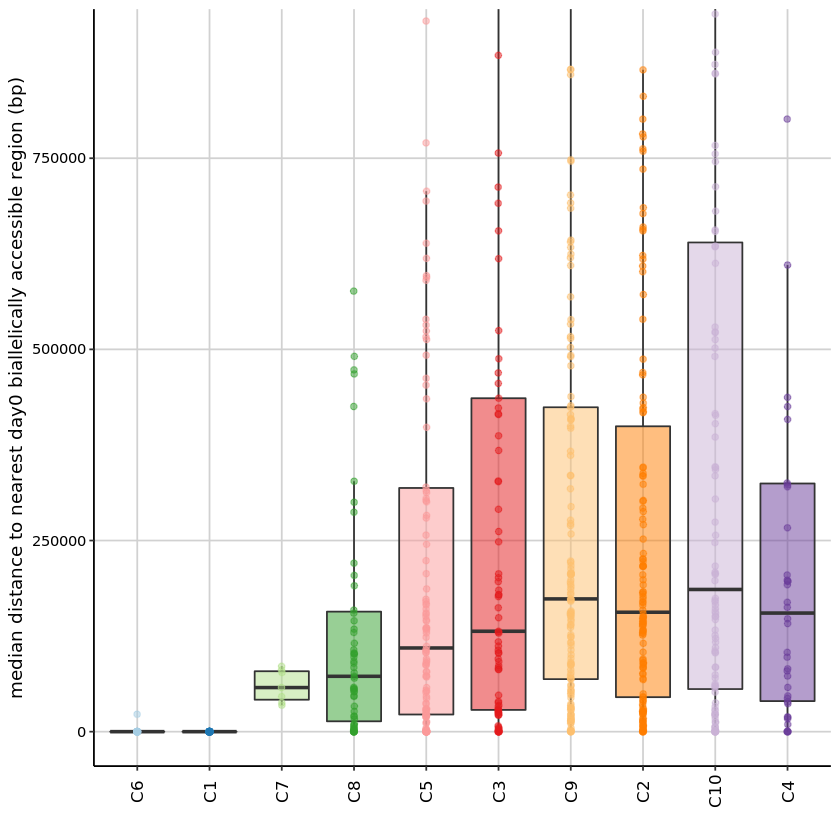

In [62]:
plot2

In [63]:
ggsave("Dist_ATAC_day0_adjScale.pdf")

Saving 6.67 x 6.67 in image
Warning message:
"Removed 660 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 660 rows containing missing values (geom_point)."